## Задание 1 - Вводное задание

In [17]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

a) Интерполяционный многочлен Лагранжа

In [18]:
import sympy as smp
from sympy.polys.polyfuncs import interpolate

t = smp.Symbol('t')

points = [(x1[i], y1[i]) for i in range(len(x1))] # Такой формат данных подаётся на вход interpolate

interpolate(points, t)

-1.11368051033974e-65*t**19 + 8.5894176609327e-61*t**18 - 3.03894567841449e-56*t**17 + 6.54400315897786e-52*t**16 - 9.59682775252215e-48*t**15 + 1.01624248636545e-43*t**14 - 8.04013544958794e-40*t**13 + 4.85128018510854e-36*t**12 - 2.25910339570297e-32*t**11 + 8.16407379682308e-29*t**10 - 2.29021106849508e-25*t**9 + 4.96310685387848e-22*t**8 - 8.22349796714838e-19*t**7 + 1.02408934896642e-15*t**6 - 9.33350242244657e-13*t**5 + 5.9735945112013e-10*t**4 - 2.50952353570492e-7*t**3 + 6.11219394825658e-5*t**2 - 0.00639503199436164*t - 0.99

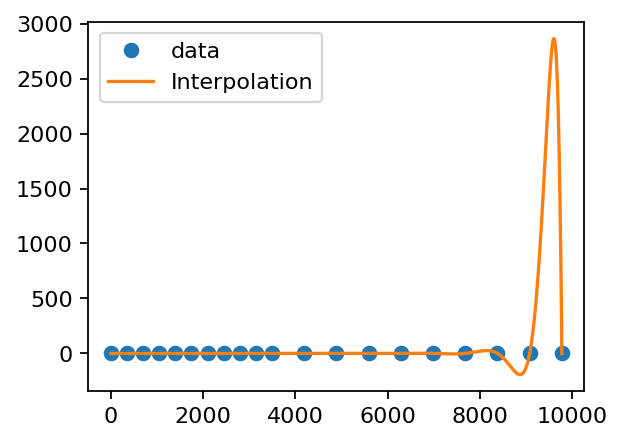

In [19]:
import matplotlib.pyplot as plt
f = smp.lambdify(t, interpolate(points, t), 'numpy') # Сделаем python функцию из нашего многочлена

xnew = np.linspace(min(x1), max(x1), 1000)

plt.figure(figsize=(4, 3), dpi=160)

plt.plot(x1, y1, 'o')
plt.plot(xnew, f(xnew))
plt.legend(['data', 'Interpolation'], loc = 'best')
plt.show()

К концу отрезка отклонения интерполяционного многочлена очень сильные

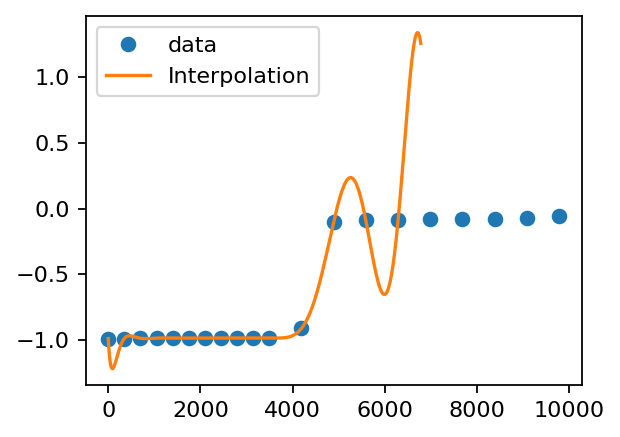

In [20]:
xnew = np.linspace(min(x1), max(x1)-3000, 1000)

plt.figure(figsize=(4, 3), dpi=160)

plt.plot(x1, y1, 'o')
plt.plot(xnew, f(xnew))
plt.legend(['data', 'Interpolation'], loc = 'best')
plt.show()

Та же интерполяция, но отрисована только до 7000 по оси Ox

б) Интерполяция кубическим сплайном

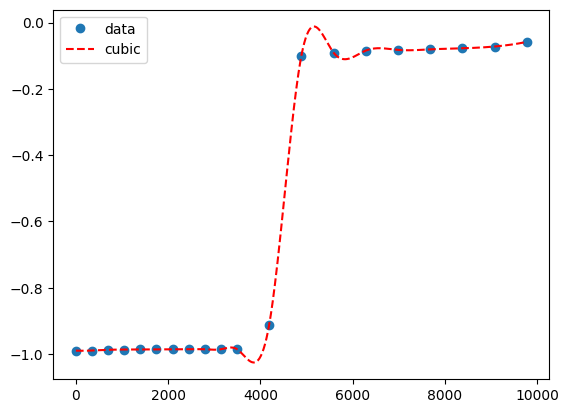

In [21]:
import scipy 
f2 = scipy.interpolate.interp1d(x1, y1, kind = 'cubic') # И что удобно, это сразу же функции

xnew = np.linspace(min(x1), max(x1), 1000)

plt.plot(x1, y1, 'o', xnew, f2(xnew), 'r--')
plt.legend(['data', 'cubic'], loc = 'best')
plt.show()

В этом случае значительных отклонений от точек не наблюдается

в) Монотонный кубический интерполянт

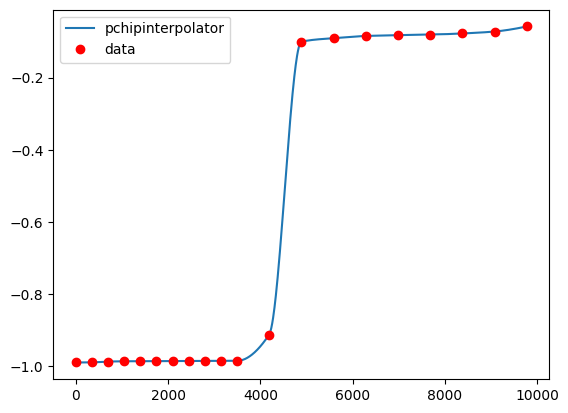

In [22]:
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt


fall = PchipInterpolator(x1,y1)
ynew=fall(xnew)



#----plot



plt.plot(xnew,ynew)
plt.plot(x1,y1,marker='o',color='r',linestyle='')
plt.legend(['pchipinterpolator', 'data'], loc = 'best')
plt.show()

г) аппроксимация полиномами с помощью numpy.Polinomial

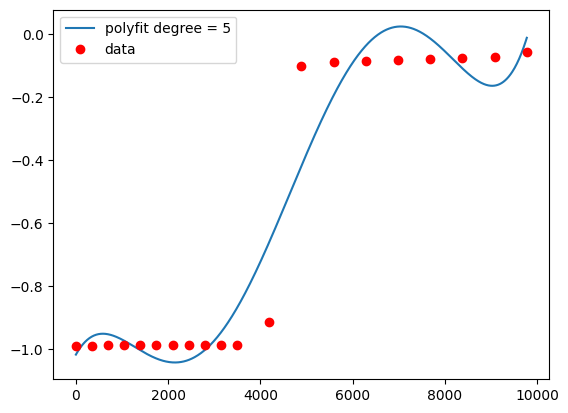

In [23]:
poly = np.polynomial.polynomial.Polynomial(coef=np.ones(25))
coef = poly.fit(x1,y1,5).convert().coef
poly.coef = coef

xnew = np.linspace(min(x1), max(x1), 1000)

ynew = poly(xnew)

plt.plot(xnew,ynew)
plt.plot(x1,y1,marker='o',color='r',linestyle='')
plt.legend(['polyfit degree = 5', 'data'], loc = 'best')
plt.show()

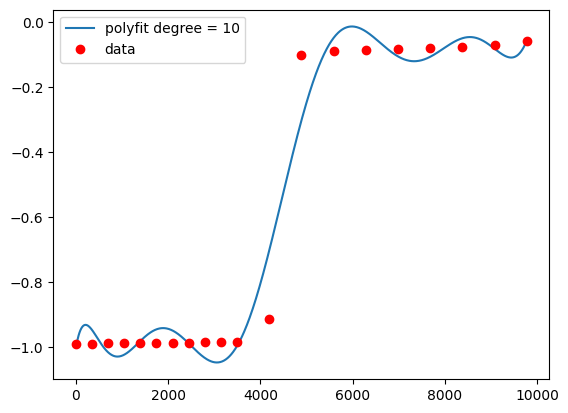

In [24]:
coef = poly.fit(x1,y1,10).convert().coef
poly.coef = coef

ynew = poly(xnew)

plt.plot(xnew,ynew)
plt.plot(x1,y1,marker='o',color='r',linestyle='')
plt.legend(['polyfit degree = 10', 'data'], loc = 'best')
plt.show()

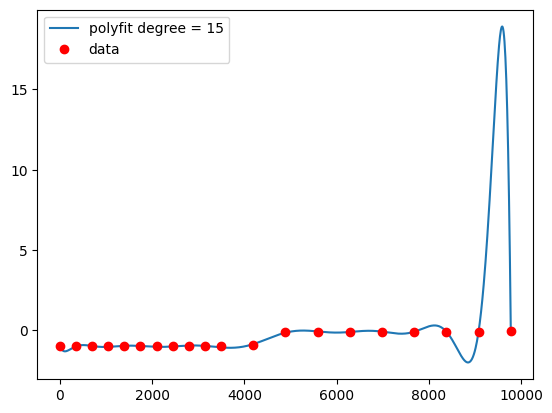

In [25]:
coef = poly.fit(x1,y1,15).convert().coef
poly.coef = coef

ynew = poly(xnew)

plt.plot(xnew,ynew)
plt.plot(x1,y1,marker='o',color='r',linestyle='')
plt.legend(['polyfit degree = 15', 'data'], loc = 'best')
plt.show()

При увеличении степени полинома появлиются сильные отклонения

## Задание 2 - Интерполяция полиномом Лагранжа

In [26]:
import numpy as np


class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        A = np.vander(xk, increasing=True)

        # Вот тут появляется ошибка (предположительно округления из-за больших размеров матрицы)
        self.coefs = np.linalg.solve(A, yk) 
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        poly = np.polynomial.polynomial.Polynomial(coef = self.coefs)

        return poly(x)

In [27]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-14

Mismatched elements: 1 / 21 (4.76%)
Max absolute difference: 1.63764334e-09
Max relative difference: 1.34286772e-07
 x: array([0.009901, 0.012195, 0.015385, 0.02    , 0.027027, 0.038462,
       0.058824, 0.1     , 0.2     , 0.5     , 1.      , 0.5     ,
       0.2     , 0.1     , 0.058824, 0.038462, 0.027027, 0.02    ,
       0.015385, 0.012195, 0.009901])
 y: array([0.009901, 0.012195, 0.015385, 0.02    , 0.027027, 0.038462,
       0.058824, 0.1     , 0.2     , 0.5     , 1.      , 0.5     ,
       0.2     , 0.1     , 0.058824, 0.038462, 0.027027, 0.02    ,
       0.015385, 0.012195, 0.009901])

assert не выполняется из-за ошибки (предположительно округления) при вычислении коэффициентов полинома

In [28]:
yy - [lagr(xval) for xval in xx]

array([ 1.56757265e-10, -8.46458580e-10, -2.30334120e-11,  6.76822029e-10,
        9.58820634e-10,  8.47536846e-10, -4.02586173e-10,  2.77896442e-10,
        2.98112868e-10,  9.68218283e-11,  1.56709312e-10,  4.97672348e-10,
        2.78396167e-10,  3.31573102e-10,  2.45212024e-10,  5.85850174e-10,
        3.80024838e-10,  3.07812303e-10,  1.32254704e-10,  1.63764334e-09,
        4.70175890e-10])

Видим, что для всех точек отклонение составило порядка $10^{-10}$

In [33]:
xx = np.linspace(-2, 2, 11)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

In [34]:
yy - [lagr(xval) for xval in xx]

array([-1.30570901e-13, -4.79095930e-14, -1.83020266e-13, -7.32608418e-14,
       -6.48370246e-14, -8.65973959e-14, -6.96387392e-14, -1.39381562e-13,
       -7.38922812e-14, -2.38867953e-13, -3.03765693e-13])

Уменьшили число точек до 11, и теперь ошибка при вычислении коэффициентов оказалась порядка $10^{-14}$, то есть теперь assert выполняется. 

*Примечание:* несмотря на заданную $atol = 10^{-14}$ и полученные некоторые отклонения $10^{-13}$, которые больше заданной, assert всё равно выполнился из-за особенностей его работы (учёт относительного отклонения).

## Задание 3 - Феномен Рунге

In [35]:
x3 = np.linspace(-2,2,4)
y3 = runge_func(x3)
x5 = np.linspace(-2,2,6)
y5 = runge_func(x5)
x7 = np.linspace(-2,2,8)
y7 = runge_func(x7)
x11 = np.linspace(-2,2,12)
y11 = runge_func(x11)
xfull = np.linspace(-2,2,200)

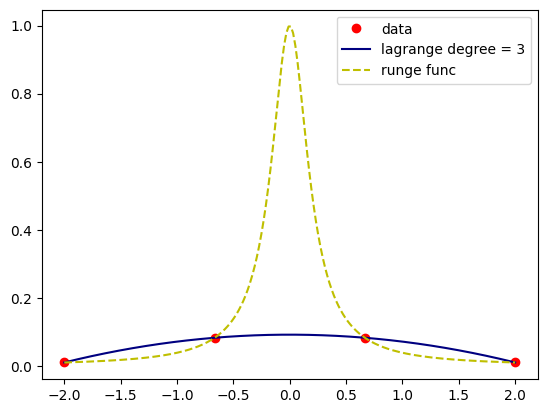

In [36]:
lagr = LagrangeInterpolator(x3, y3)

plt.plot(x3,y3,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 3', 'runge func'], loc = 'best')
plt.show()

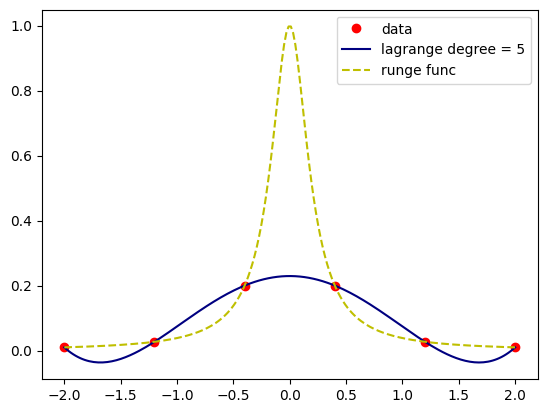

In [37]:
lagr = LagrangeInterpolator(x5, y5)

plt.plot(x5,y5,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 5', 'runge func'], loc = 'best')
plt.show()

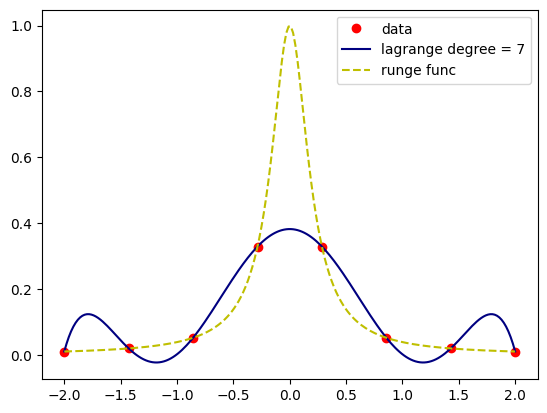

In [38]:
lagr = LagrangeInterpolator(x7, y7)

plt.plot(x7,y7,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 7', 'runge func'], loc = 'best')
plt.show()

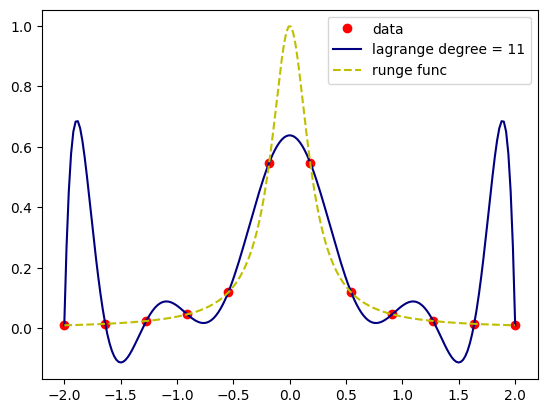

In [39]:
lagr = LagrangeInterpolator(x11, y11)

plt.plot(x11,y11,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 11', 'runge func'], loc = 'best')
plt.show()

Видим, что феномен Рунге проявляется очень сильно.

In [40]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """

    return np.array([(a+b)/2+(b-a)/2*np.cos((2*k+1)/(2*(n))*np.pi) for k in range(n-1,-1,-1)])

In [41]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

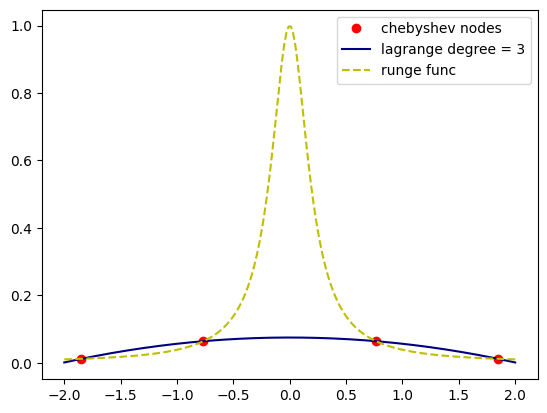

In [42]:
x = cheb_nodes(4, -2,2)
y = runge_func(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 3', 'runge func'], loc = 'best')
plt.show()

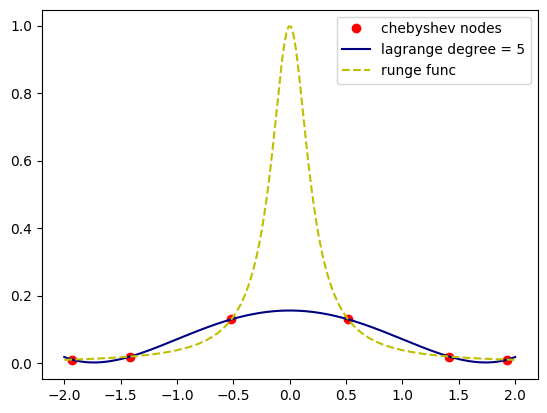

In [43]:
x = cheb_nodes(6, -2,2)
y = runge_func(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 5', 'runge func'], loc = 'best')
plt.show()

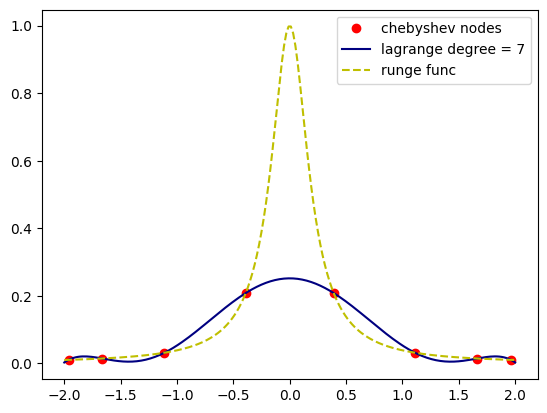

In [44]:
x = cheb_nodes(8, -2,2)
y = runge_func(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 7', 'runge func'], loc = 'best')
plt.show()

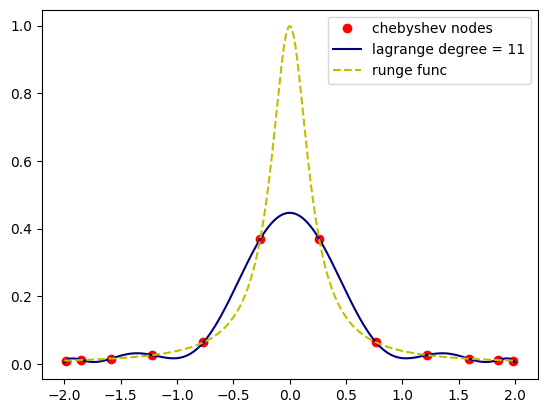

In [45]:
x = cheb_nodes(12, -2,2)
y = runge_func(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 11', 'runge func'], loc = 'best')
plt.show()

Видим, что аппроксимация всё равно далека от идеальной, однако значительно лучше, чем для равномерной сетки, то есть феномен Рунге проявляется значительно слабее.

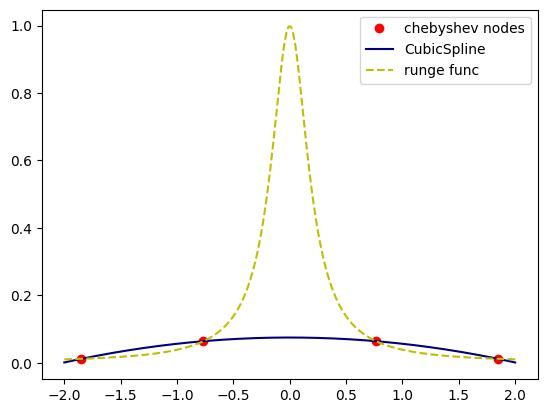

In [46]:
from scipy.interpolate import CubicSpline

x = cheb_nodes(4, -2,2)
y = runge_func(x)

cube =CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'runge func'], loc = 'best')
plt.show()

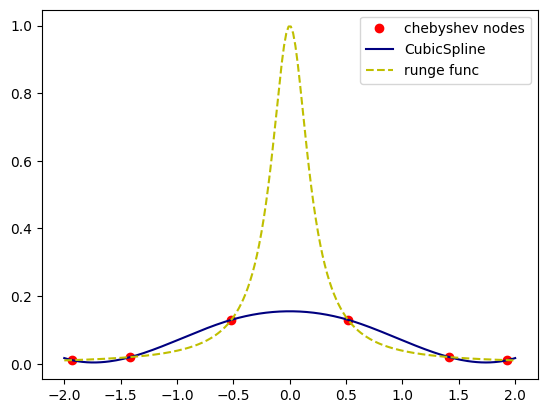

In [47]:
x = cheb_nodes(6, -2,2)
y = runge_func(x)

cube =CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'runge func'], loc = 'best')
plt.show()

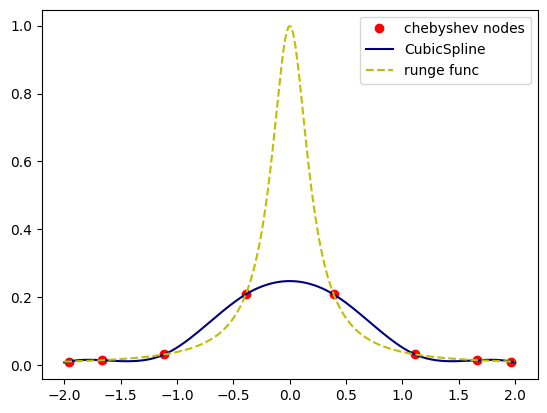

In [48]:
x = cheb_nodes(8, -2,2)
y = runge_func(x)

cube =CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'runge func'], loc = 'best')
plt.show()

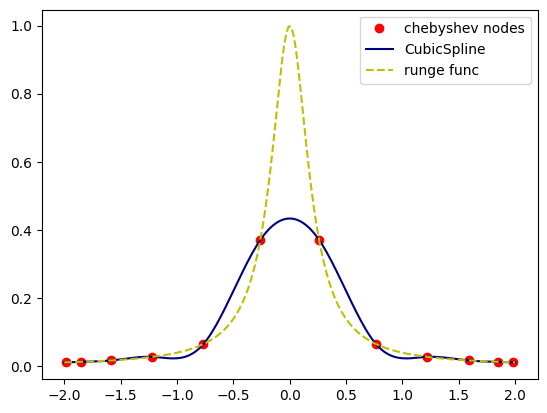

In [49]:
x = cheb_nodes(12, -2,2)
y = runge_func(x)

cube =CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, runge_func(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'runge func'], loc = 'best')
plt.show()

При интерполяции кубическим сплайном (с помощью узлов Чебышева) феномен Рунге проявляется слабо (примерно как и в случае полинома Лагранжа).

Рассмотрим другую функцию

In [50]:
def u(x):
    eps = 0.21
    return np.sqrt(eps*(2+eps))/(2*np.pi*(1+eps-np.cos(x)))

x3 = np.linspace(-np.pi,np.pi,4)
y3 = u(x3)
x5 = np.linspace(-np.pi,np.pi,6)
y5 = u(x5)
x7 = np.linspace(-np.pi,np.pi,8)
y7 = u(x7)
x11 = np.linspace(-np.pi,np.pi,12)
y11 = u(x11)
xfull = np.linspace(-np.pi,np.pi,200)

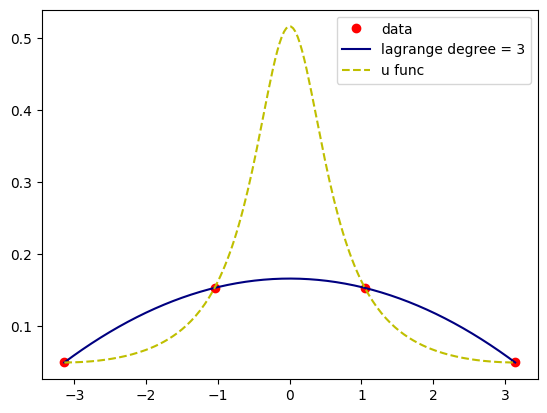

In [51]:
lagr = LagrangeInterpolator(x3, y3)

plt.plot(x3,y3,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 3', 'u func'], loc = 'best')
plt.show()

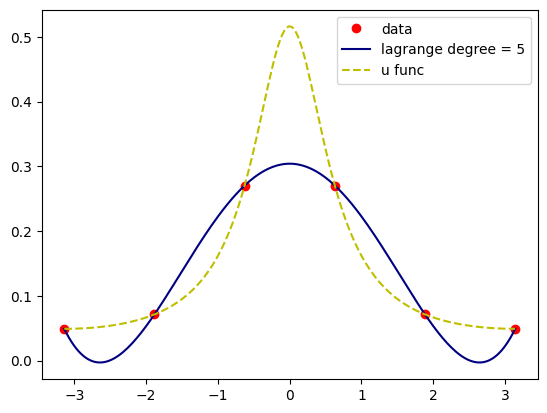

In [52]:
lagr = LagrangeInterpolator(x5, y5)

plt.plot(x5,y5,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 5', 'u func'], loc = 'best')
plt.show()

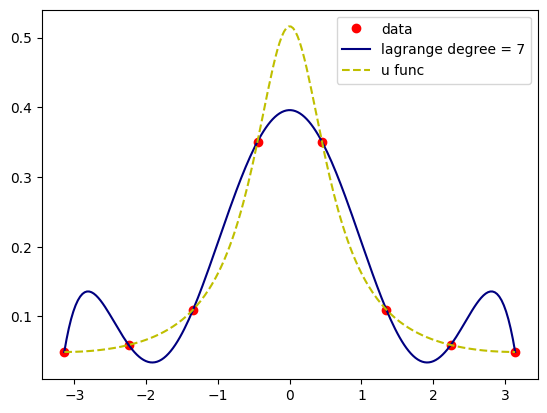

In [53]:
lagr = LagrangeInterpolator(x7, y7)

plt.plot(x7,y7,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 7', 'u func'], loc = 'best')
plt.show()

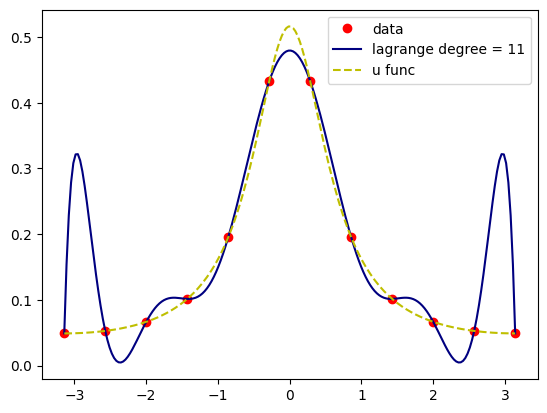

In [54]:
lagr = LagrangeInterpolator(x11, y11)

plt.plot(x11,y11,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['data', 'lagrange degree = 11', 'u func'], loc = 'best')
plt.show()

Аналогично функции Рунге появляются сильные осцилляции.

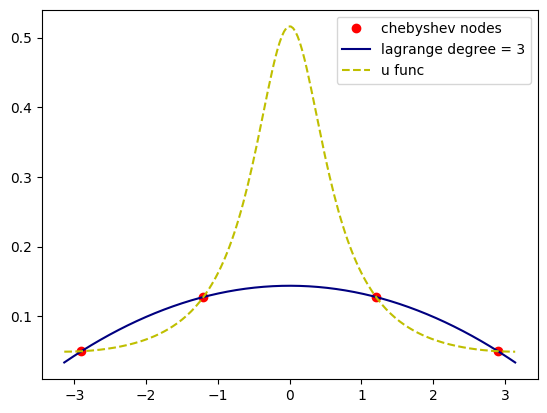

In [55]:
x = cheb_nodes(4, -np.pi,np.pi)
y = u(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 3', 'u func'], loc = 'best')
plt.show()

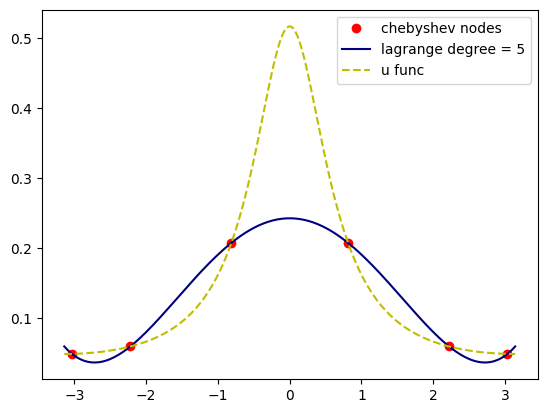

In [56]:
x = cheb_nodes(6, -np.pi,np.pi)
y = u(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 5', 'u func'], loc = 'best')
plt.show()

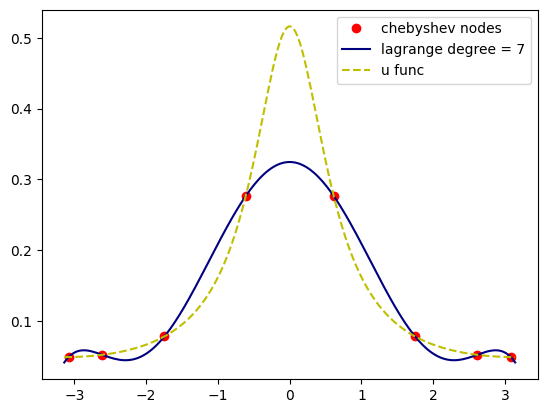

In [57]:
x = cheb_nodes(8, -np.pi,np.pi)
y = u(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 7', 'u func'], loc = 'best')
plt.show()

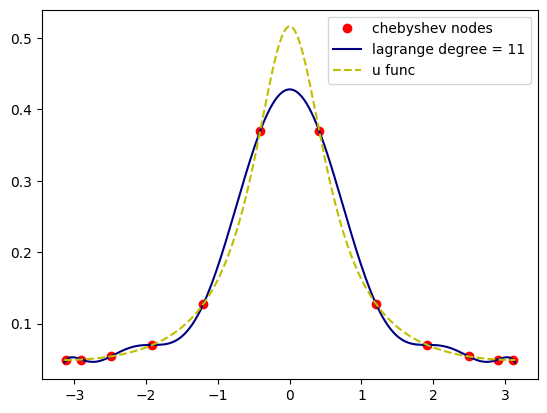

In [58]:
x = cheb_nodes(12, -np.pi,np.pi)
y = u(x)

lagr = LagrangeInterpolator(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'lagrange degree = 11', 'u func'], loc = 'best')
plt.show()

С помощью узлов Чебышева удалось значительно уменьшить осцилляции.

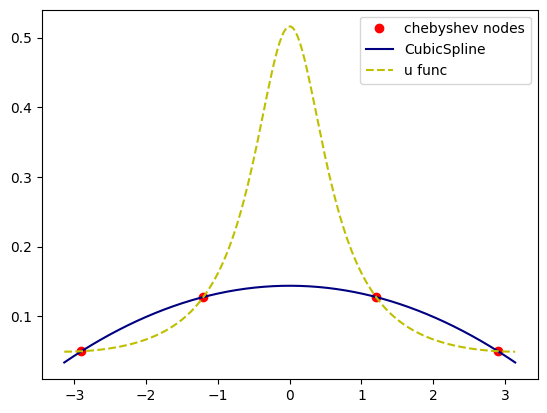

In [59]:
x = cheb_nodes(4, -np.pi,np.pi)
y = u(x)

cube = CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'u func'], loc = 'best')
plt.show()

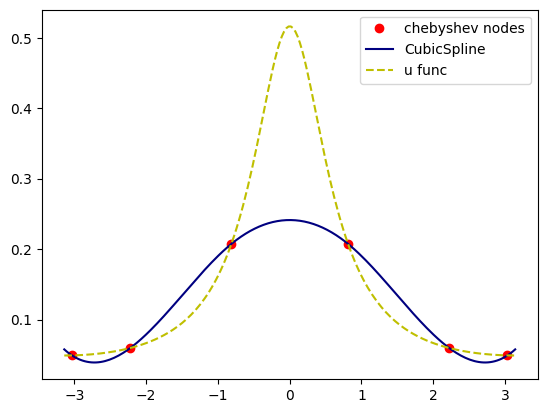

In [60]:
x = cheb_nodes(6, -np.pi,np.pi)
y = u(x)

cube = CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'u func'], loc = 'best')
plt.show()

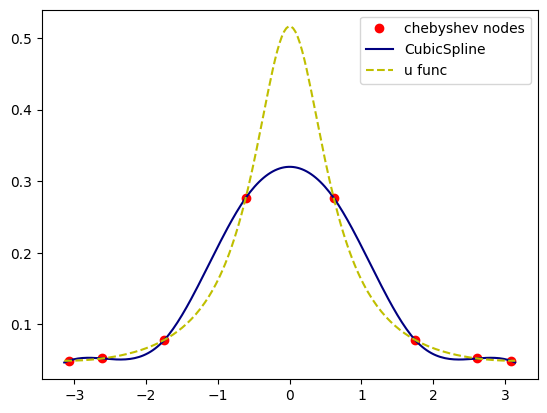

In [61]:
x = cheb_nodes(8, -np.pi,np.pi)
y = u(x)

cube = CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'u func'], loc = 'best')
plt.show()

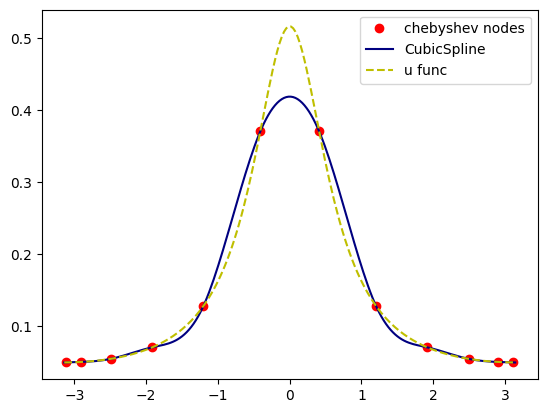

In [62]:
x = cheb_nodes(12, -np.pi,np.pi)
y = u(x)

cube = CubicSpline(x, y)

plt.plot(x,y,marker='o',color='r',linestyle='')
plt.plot(xfull,cube(xfull),color='navy',linestyle='-')
plt.plot(xfull, u(xfull),color='y',linestyle='--')
plt.legend(['chebyshev nodes', 'CubicSpline', 'u func'], loc = 'best')
plt.show()

При интерполяции кубическим сплайном (при помощи узлов Чебышева) феномен Рунге проявляется ещё слабее.

## Задание 4 - UnivariateSpline

Зная распределение шума данных $\xi_i \propto 0.5 \cdot\mathcal{N}(0,1)$ (а точнее стандартное отклонение, в нашем случае $\sigma = 0.5 \times 1 = 0.5$), согласно документации можем задать параметр весов точек как $w = \dfrac{1}{\sigma} = 2$, а тогда оптимальный параметр сглаживания $s \in (m-\sqrt{2m}, m+\sqrt{2m})$, где $m$ - количество точек.

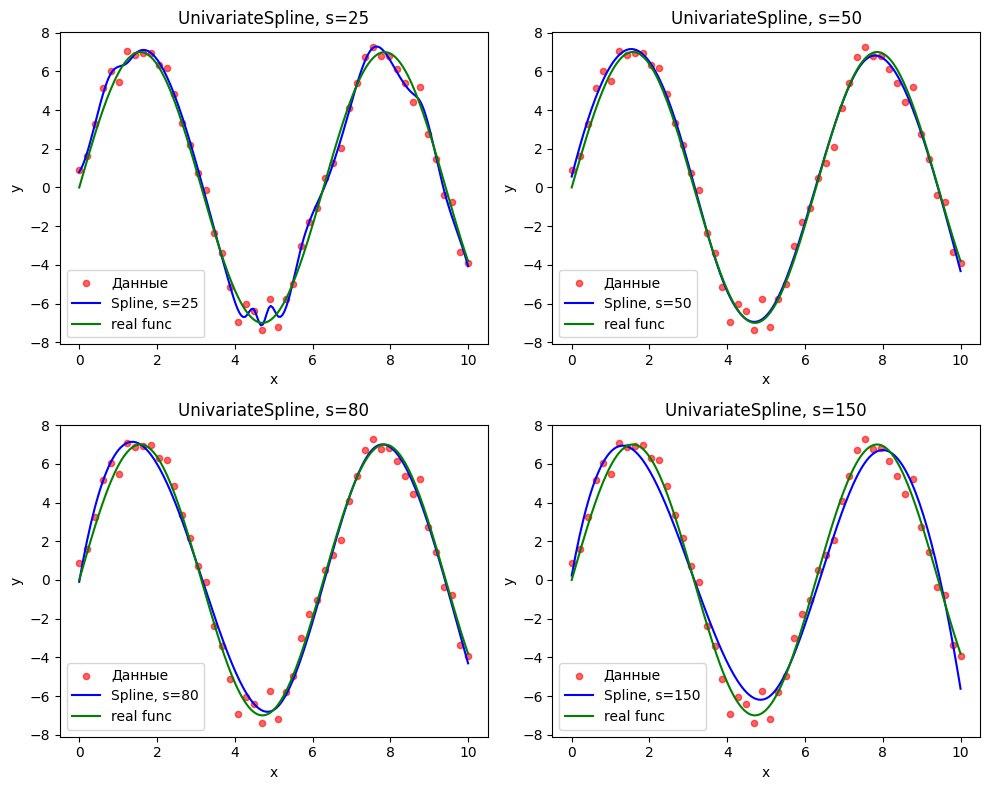

In [63]:
from scipy.interpolate import UnivariateSpline

# Сгенерируем искусственные данные: небольшая функция + шум
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = 7*np.sin(x) + 0.5*np.random.randn(len(x))

# Четыре разных значения параметра s (сильная переобученность -> сильный недофит)
s_values = [25, 50, 80, 150]  # s=1e-6 - "слишком маленький", s=10 - "слишком большой", два других "где-то посередине"

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()  # Раскладываем двумерный массив осей в один

for i, s in enumerate(s_values):
    spline = UnivariateSpline(x, y, s=s, w = np.array([2]*len(x)))
    
    # Рисуем исходные точки
    axes[i].scatter(x, y, label='Данные', color='red', s=20, alpha=0.6)
    
    # Рисуем аппроксимирующую кривую
    xs = np.linspace(0, 10, 200)
    ys = spline(xs)
    axes[i].plot(xs, ys, label=f'Spline, s={s}', color='blue')
    axes[i].plot(xs, 7*np.sin(xs), label=f'real func', color='green')
    
    axes[i].set_title(f'UnivariateSpline, s={s}')
    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

plt.tight_layout()
plt.show()

В данном случае согласно документации интервал оптимального $s$ равен $(40,60)$. Действительно, видим что при меньших значениях параметра ($s = 25$) наблюдается переобучение, а при больших значениях ($s=80$ и $s=150$) излишнее сглаживание приводит к заметному отклонению от заданной функции.

## Задание 5 - Производная и шум

In [105]:
t = np.linspace(0, 1000, 1000)
u = 200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t)) + 0.5 * np.random.randn(len(t))
du_real = -1/2/(1+t/200)**2*(1+np.cos(0.04*t))-4/(1+t/200)*np.sin(0.04*t)

# Разностная схема первого порядка
du = np.array([(u[i+1]-u[i])/(t[i+1]-t[i]) for i in range(1000-1)]) 

Оптимальный шаг дифференцирования зависит от конкретной разностной схемы, однако в нашем случае точкой преткновения становится минимальный заданный шаг между точками $h=1$ (так как запрет на генерацию новых точек), в то время как у большинства схем оптимальный шаг примерно $10^{-8}-10^{-6}$ (как например было показано в семинаре 1). 

Так как формула оптимального шага дифференцирования для разностной схемы порядка $n$ выглядит как $h^*_n \propto \sqrt[n]{\dfrac{1}{M_n}}$, где $M_n$ - максимум модуля $n$-той производной на отрезке, в нашем случае это будет значит, что при разностной схеме большего порядка оптимальный шаг будет увеличиваться (проворено Вольфрамом, что $M_n$ убывают достаточно быстро), и в какой то момент он станет сравнимым с единицей, то есть мы достигнем оптимального шага дифференцирования при заданной сетке точек. Например, при $n=6$ оптимальный шаг $h^* \approx 0.1$. Тогда воспользуемся таблицами коэффициентов численного дифференцирования.

In [106]:
du_6 = np.array([-49/20*u[i]+6*u[i+1]-15/2*u[i+2]+20/3*u[i+3]-15/4*u[i+4]+6/5*u[i+5]-1/6*u[i+6] for i in range(1000-6)])

Ещё вычислим центральную разностную схему, дающую точность до 4го порядка.

In [107]:
du_2 = np.array([1/12*u[i-2]-2/3*u[i-1]+2/3*u[i+1]-1/12*u[i+2] for i in range(2, 1000-2)])

А теперь с помощью сплайна

In [108]:
spline = UnivariateSpline(t, u, s=1000, w = np.array([2]*len(t)))
dus = (spline.derivative())(t)

Text(510.4494949494949, 0.5, 'y')

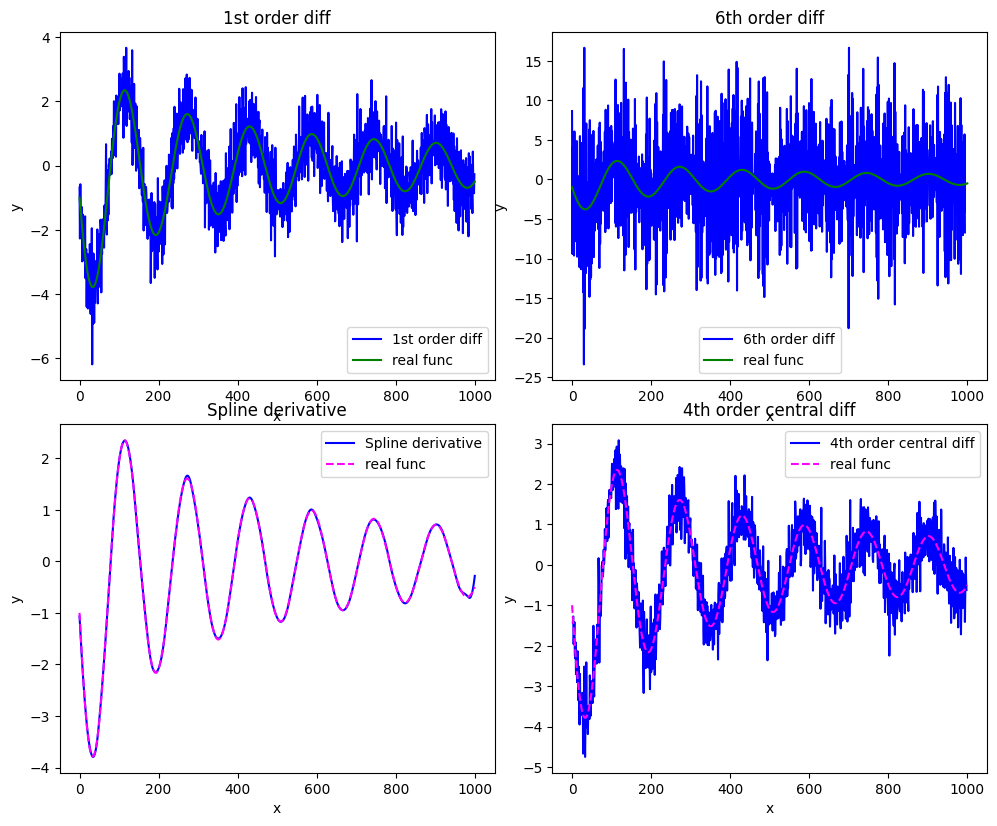

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.tight_layout()
axes = axes.ravel()

axes[0].plot(t[:-1], du, label=f'1st order diff', color='blue')
axes[0].plot(t, du_real, label=f'real func', color='green')

axes[0].set_title(f'1st order diff')
axes[0].legend()
axes[0].set_xlabel('x')
axes[0].set_ylabel('y') 

axes[1].plot(t[:-6], du_6, label=f'6th order diff', color='blue')
axes[1].plot(t, du_real, label=f'real func', color='green')

axes[1].set_title(f'6th order diff')
axes[1].legend()
axes[1].set_xlabel('x')
axes[1].set_ylabel('y') 

axes[2].plot(t, dus, label=f'Spline derivative', color='blue')
axes[2].plot(t, du_real, label=f'real func', color='magenta', linestyle='--')

axes[2].set_title(f'Spline derivative')
axes[2].legend()
axes[2].set_xlabel('x')
axes[2].set_ylabel('y') 

axes[3].plot(t[2:-2], du_2, label=f'4th order central diff', color='blue')
axes[3].plot(t, du_real, label=f'real func', color='magenta', linestyle='--')

axes[3].set_title(f'4th order central diff')
axes[3].legend()
axes[3].set_xlabel('x')
axes[3].set_ylabel('y') 

Видим, что вся точность схемы 6го порядка нивелировалась шумом точек, из-за чего потерялся даже характерный вид графика.

Точности для центральной схемы 4го порядка и обычной схемы 1го порядка примерно совпали, а производная, полученная с помощью сплайна практически идеально совпадает с настоящей.

Посчитаем метрику MSE:

In [112]:
from sklearn.metrics import mean_squared_error 

MSE_1 = mean_squared_error(du_real[:-1],du)

MSE_6 = mean_squared_error(du_real[:-6], du_6)

MSE_spline = mean_squared_error(du_real, dus)

MSE_4_c = mean_squared_error(du_real[2:-2], du_2)

MSE_1, MSE_6, MSE_spline, MSE_4_c

(0.5125493340846369,
 39.587530824222455,
 0.00042200050938586624,
 0.23614868018894333)

Посчитанная метрика подтверждает визуальный результат: 

Сплайн гораздо точнее остальных методов, разностная схема 6го порядка гораздо хуже остальных, а центральная схема 4го порядка сопоставима по точности с простой схемой 1го порядка.

## Задание 6* - Аппроксимация узлов Чебышева

In [126]:
with np.load('data_interp.npz') as data:
  x5, y5 = data['x5'], data['y5']

def g(s, a):
    return 1/53089*(40320*s+6720*s**3+3024*s**5+1800*s**7+1225*s**9) - a

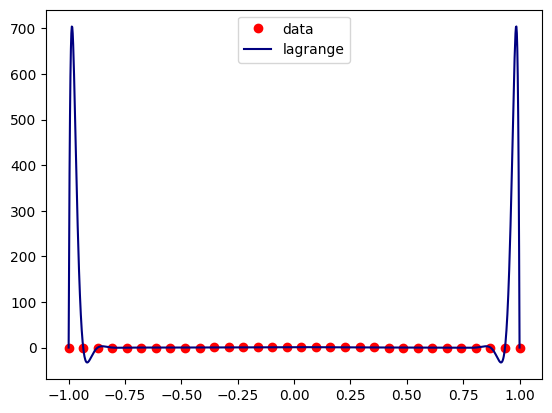

In [143]:
lagr = LagrangeInterpolator(x5, y5)

xfull = np.linspace(min(x5), max(x5), 1000)

plt.plot(x5,y5,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr(xfull),color='navy',linestyle='-')
plt.legend(['data', 'lagrange'], loc = 'best')
plt.show()

Видим явный эффект Рунге

In [144]:
from scipy.optimize import fsolve # Находит корни функции

s_arr = np.array([fsolve(g,0, x) for x in x5]).reshape(-1)
s_full = np.array([fsolve(g,0, x) for x in xfull]).reshape(-1)

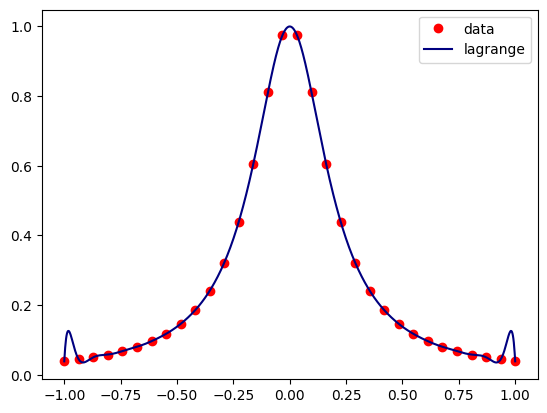

In [145]:
lagr_1 = LagrangeInterpolator(s_arr, y5)

plt.plot(x5,y5,marker='o',color='r',linestyle='')
plt.plot(xfull,lagr_1(s_full),color='navy',linestyle='-')
plt.legend(['data', 'lagrange', 'u func'], loc = 'best')
plt.show()

Эффектр Рунге проявляется намного слабее - приём с заменой сработал!